In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import fbeta_score, make_scorer

from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.metrics import average_precision_score

from sklearn.preprocessing import label_binarize

In [2]:
# Cargamos ambos archivos, tanto el de Aguas Superficiales como el de Aguas Subterráneas ya limpios

url1 = '/Users/alexishema/Downloads/DF_Superficiales_Limpio.csv'
url2 = '/Users/alexishema/Downloads/DF_Subterraneas_Limpio.csv'

df_Superficiales = pd.read_csv(url1)
df_Subterraneas = pd.read_csv(url2)



In [3]:
# Aquí definimos las métricas a utilizar

#Funciones de las metricas
#Funcion Accuracy
# def mi_accuracy(yreal, ypred):
#   cm = confusion_matrix(yreal, ypred)
#   vn, fp, fn, vp = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
  
#   return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)

def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)
   

#Funcion Precision
def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  result = (vp)/(vp+fp+np.finfo(np.float32).eps)  
  return result

#Funcion recall
def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3
  
  return (vp)/(vp+fn+np.finfo(np.float32).eps)

#Funcin G-Mean
def mi_gmean(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3
  
    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3
    
    recall = vp / (vp+fn+np.finfo(np.float32).eps)
    especificidad = vn / (vn+fp+np.finfo(np.float32).eps)
    gmean = np.sqrt(recall * especificidad)

    return gmean

#Funcion f1-score
def mi_f1score(yreal, ypred):

    cm = confusion_matrix(yreal, ypred)
    VPC1 = cm[0,0]
    VPC2 = cm[1,1]
    VPC3 = cm[2,2]
    vp = VPC1 + VPC2 + VPC3

    FPC1 = cm[0,1] + cm[0,2]
    FPC2 = cm[1,0] + cm[1,2]
    FPC3 = cm[2,0] + cm[2,1]
    fp = FPC1 + FPC2 + FPC3
  
    FNC1 = cm[1,0] + cm[2,0]
    FNC2 = cm[0,1] + cm[2,1]
    FNC3 = cm[0,2] + cm[1,2]
    fn = FNC1 + FNC2 + FNC3

    VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
    VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
    VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
    vn = VNC1 + VNC2 + VNC3 
    
    return (2*vp)/((2*vp)+fp+fn+np.finfo(np.float32).eps)


Me_Accuracy = make_scorer(mi_accuracy)
Me_Precision = make_scorer(mi_precision)
Me_Recall = make_scorer(mi_recall)
Me_F1Score = make_scorer(mi_f1score)
Me_Gmean = make_scorer(mi_gmean)

mismetricas = {"Accuracy":Me_Accuracy,"Precision":Me_Precision,"Recall":Me_Recall,"F1Score":Me_F1Score,"Gmean":Me_Gmean}

In [4]:
# Aplicamos ONE HOT ENCODER
# Y1 es para Aguas Superficiales
# Y2 es para Aguas Subterráneas

OHE = OneHotEncoder()
df_Superficiales_copia = df_Superficiales.copy()
dOHE= OHE.fit_transform(df_Superficiales_copia[["SEMAFORO"]])
Y1OHE = pd.DataFrame(dOHE.toarray(), columns=["Amarillo","Rojo","Verde"], dtype=int)

df_Subterraneas_copia = df_Subterraneas.copy()
d2OHE= OHE.fit_transform(df_Subterraneas_copia[["SEMAFORO"]])
Y2OHE = pd.DataFrame(d2OHE.toarray(), columns=["Amarillo","Rojo","Verde"], dtype=int)



In [5]:
# Definimos las variables de entrada X y de salida Y para hacer el split de las muestras Train Test
# Y1 es para Aguas Superficiales
# Y2 es para Aguas Subterráneas

Y1 = df_Superficiales[["SEMAFORO_Type"]]
Y2 = df_Subterraneas[["SEMAFORO_Type"]]


# X1 es para Aguas Superficiales
# X2 es para Aguas Subterráneas

# Aguas Superficiales
NumericasQuimicas1 = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']

OrdinalesQuimicas1 = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15']

CategoricasQuimicas1 = ['ESTADO','MUNICIPIO','TIPO','SUBTIPO']


# Aguas Subterráneas

NumericasQuimicas2 = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]

CategoricasQuimicas2 = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']

OrdinalesQuimicas2 = ['ESTADO','MUNICIPIO','SUBTIPO']




X1 =  df_Superficiales[NumericasQuimicas1 + OrdinalesQuimicas1 + CategoricasQuimicas1]
X2 =  df_Subterraneas[NumericasQuimicas2 + OrdinalesQuimicas2 + CategoricasQuimicas2]



In [250]:
# Realizamos las particiones correspondientes

X1train, X1test, Y1train , Y1test = train_test_split(X1, Y1, train_size=0.85, random_state=42)
print("Para Aguas Superficiales X train es",X1train.shape)
print("Para Aguas Superficiales Y train es",Y1train.shape)

X2train, X2test, Y2train , Y2test = train_test_split(X2, Y2, train_size=0.85, random_state=42)
print("\nPara Aguas Subterráneas X train es",X2train.shape)
print("Para Aguas Subterráneas Y train es",Y2train.shape)



Para Aguas Superficiales X train es (2969, 32)
Para Aguas Superficiales Y train es (2969, 1)

Para Aguas Subterráneas X train es (907, 32)
Para Aguas Subterráneas Y train es (907, 1)


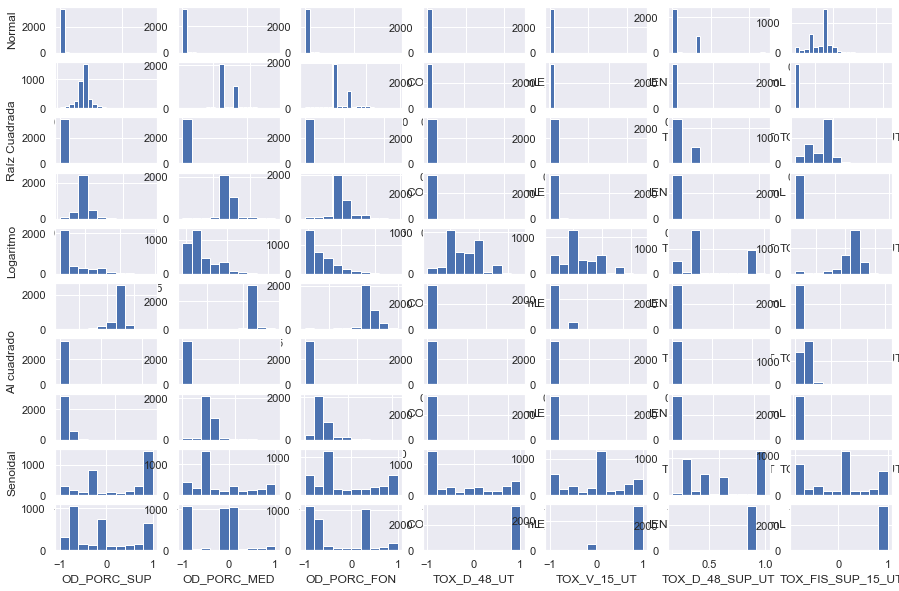

In [249]:
# Acá se realiza un análisis gráfico de los datos, con el objetivo de eliminar sesgo a la derecha o izquierda

# Análisis para Aguas Superficiales 

sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(10, 7)   
for k in range(0,14):  
  plt.subplot(10,7,k+1) 

  Transf0 = df_Superficiales[NumericasQuimicas1].iloc[:,k].to_numpy().reshape(-1, 1)  
  plt.hist(Transf0, bins=20) 
  plt.xlabel(NumericasQuimicas1[k])
  if k==0:
    plt.ylabel('Normal')

  plt.subplot(10,7,k+15)    
  Transf1 = Transf0**1/2       
  plt.hist(Transf1)  
  plt.xlabel(NumericasQuimicas1[k])                    
  if k==0:
    plt.ylabel('Raíz Cuadrada')    

  plt.subplot(10,7,k+29)  
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2)                      
  plt.xlabel(NumericasQuimicas1[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(10,7,k+43)  
  Transf3 = Transf0**2    
  plt.hist(Transf3)   
  plt.xlabel(NumericasQuimicas1[k])
  if k==0:
    plt.ylabel('Al cuadrado')
    
  plt.subplot(10,7,k+57)  
  Transf4 = np.sin(Transf0)   
  plt.hist(Transf4)   
  plt.xlabel(NumericasQuimicas1[k])
  if k==0:
    plt.ylabel('Senoidal')  

plt.show()

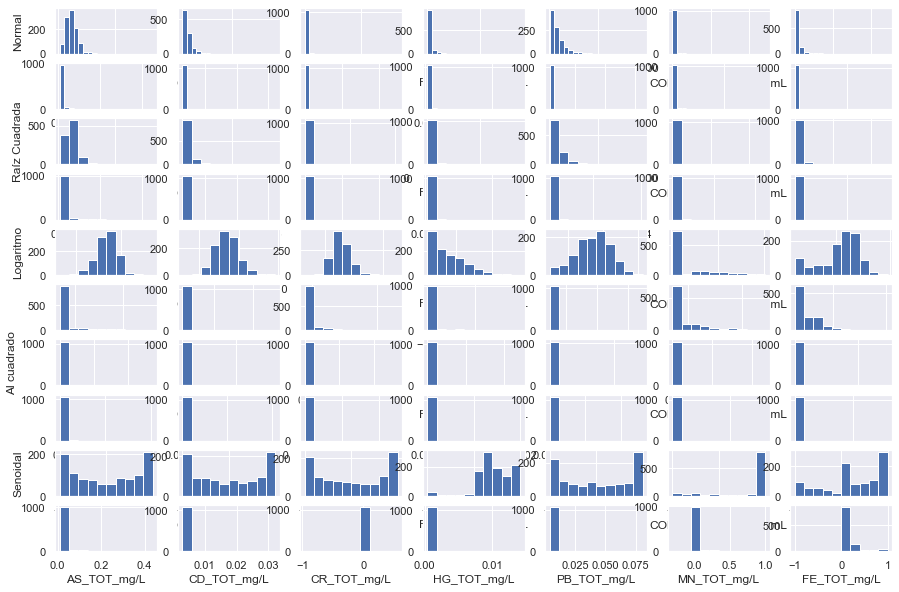

In [8]:
# Acá se realiza un análisis gráfico de los datos, con el objetivo de eliminar sesgo a la derecha o izquierda

# Análisis para Aguas Subterráneas

sns.set(rc={'figure.figsize':(15,10)})
fig, axes = plt.subplots(10, 7)   
for k in range(0,14):  
  plt.subplot(10,7,k+1) 

  Transf0 = df_Subterraneas[NumericasQuimicas2].iloc[:,k].to_numpy().reshape(-1, 1)  
  plt.hist(Transf0, bins=20) 
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Normal')

  plt.subplot(10,7,k+15)    
  Transf1 = Transf0**1/2       
  plt.hist(Transf1)  
  plt.xlabel(NumericasQuimicas2[k])                    
  if k==0:
    plt.ylabel('Raíz Cuadrada')    

  plt.subplot(10,7,k+29)  
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2)                      
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(10,7,k+43)  
  Transf3 = Transf0**2    
  plt.hist(Transf3)   
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Al cuadrado')
    
  plt.subplot(10,7,k+57)  
  Transf4 = np.sin(Transf0)   
  plt.hist(Transf4)   
  plt.xlabel(NumericasQuimicas2[k])
  if k==0:
    plt.ylabel('Senoidal')  

plt.show()

In [9]:
# Procedemos a hacer la creación del Pipeline
# Realizamos el MinMaxScaler entre 1 y 3 para evitar divisiones entre 0
# PIPE para Aguas Superficiales

Superficiales_numericas_pipeline = Pipeline(steps = [('Escalar', MinMaxScaler(feature_range=(1,3))) ,
                                         ('Logaritmo', FunctionTransformer(np.log))])  
Superficiales_numericas_nombres = NumericasQuimicas1



Superficiales_categoricas_pipeline = Pipeline(steps = [('OHE', OneHotEncoder(handle_unknown='ignore'))])
 
Superficiales_categoricas_nombres = CategoricasQuimicas1



Superficiales_ordinales_pipeline = Pipeline(steps = [ ('OHE', OneHotEncoder(handle_unknown='ignore'))])
   
Superficiales_ordinales_nombres = OrdinalesQuimicas1




CT1 = ColumnTransformer(transformers = [('numerica', Superficiales_numericas_pipeline, Superficiales_numericas_nombres),
                                         ('categorica', Superficiales_categoricas_pipeline,Superficiales_categoricas_nombres),
                                         ('ordinal', Superficiales_ordinales_pipeline,Superficiales_ordinales_nombres),
                                                       ],  remainder='passthrough')

In [251]:
# Procedemos a hacer la creación del Pipeline
# Realizamos el MinMaxScaler entre 1 y 3 para evitar divisiones entre 0
# PIPE para Aguas Subterráneas

Superficiales_numericas_pipeline2 = Pipeline(steps = [('Escalar', MinMaxScaler(feature_range=(1,3))) ,
                                         ('Logaritmo', FunctionTransformer(np.log))])  
Superficiales_numericas_nombres2 = NumericasQuimicas1



Superficiales_categoricas_pipeline2 = Pipeline(steps = [('OHE', OneHotEncoder(handle_unknown='ignore'))])
 
Superficiales_categoricas_nombres2 = CategoricasQuimicas1



Superficiales_ordinales_pipeline2 = Pipeline(steps = [ ('OHE', OneHotEncoder(handle_unknown='ignore'))])
   
Superficiales_ordinales_nombres2 = OrdinalesQuimicas1




CT2 = ColumnTransformer(transformers = [('numerica2', Superficiales_numericas_pipeline2, Superficiales_numericas_nombres2),
                                         ('categorica2', Superficiales_categoricas_pipeline2,Superficiales_categoricas_nombres2),
                                         ('ordinal2', Superficiales_ordinales_pipeline2,Superficiales_ordinales_nombres2),
                                                       ],  remainder='passthrough')

In [78]:
# Empezamos a analizar con Decision Tree
# Decision Tree para Aguas Superficiales

scaler = MinMaxScaler(feature_range=(1,3))
Y1E=scaler.fit_transform(Y1train)

modeloDT = DecisionTreeClassifier(random_state = 42)


dicc_gridDT = {'m__ccp_alpha':[0.07],
              'm__criterion':['gini','entropy'],
              'm__max_depth':[1,8,15,20],
              'm__min_samples_split':[2,5,10],
              'm__class_weight':['balanced'],
                           }

                          
 
pipeline = Pipeline(steps=[('ct',CT1),('m',modeloDT)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridDT = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_gridDT, 
                    cv=cv, 
                    scoring= make_scorer(mi_gmean))


gridDT.fit(X1train, Y1train)
gridDT.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridDT.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridDT.best_params_)
print('Métrica utilizada:', gridDT.scoring)

Mejor valor obtenido con la mejor combinación: 0.9752057968192761
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.07, 'm__class_weight': 'balanced', 'm__criterion': 'gini', 'm__max_depth': 8, 'm__min_samples_split': 2}
Métrica utilizada: make_scorer(mi_gmean)


In [79]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados = list()   
pipeline = Pipeline(steps=[('ct',CT1),('m',modeloDT_Optimizado)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)



scores = cross_validate(pipeline, X1train, np.ravel(Y1train), scoring=mismetricas, cv=cv, return_train_score=True)


resultados.append(scores)

print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nmean Train Gmean: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\n\nmean Train F1score: %.3f (%.4f)\nmean Test F1score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados[0]['train_Accuracy']),
                                                                                                 np.std(resultados[0]['train_Accuracy']),
                                                                                                 np.mean(resultados[0]['test_Accuracy']),
                                                                                                 np.std(resultados[0]['test_Accuracy']),
                                                                                                 np.mean(resultados[0]['train_Precision']),
                                                                                                 np.std(resultados[0]['train_Precision']),  
                                                                                                 np.mean(resultados[0]['test_Precision']),
                                                                                                 np.std(resultados[0]['test_Precision']),  
                                                                                                 np.mean(resultados[0]['train_Recall']),
                                                                                                 np.std(resultados[0]['train_Recall']),
                                                                                                 np.mean(resultados[0]['test_Recall']),
                                                                                                 np.std(resultados[0]['test_Recall']),
                                                                                                 np.mean(resultados[0]['train_Gmean']),
                                                                                                 np.std(resultados[0]['train_Gmean']),
                                                                                                 np.mean(resultados[0]['test_Gmean']),
                                                                                                 np.std(resultados[0]['test_Gmean']),
                                                                                                 np.mean(resultados[0]['train_F1Score']),
                                                                                                 np.std(resultados[0]['train_F1Score']), 
                                                                                                 np.mean(resultados[0]['test_F1Score']),
                                                                                                 np.std(resultados[0]['test_F1Score']), 
                                                                                                  ))



mean Train Accuracy: 0.981 (0.0013)
mean Test Accuracy: 0.978 (0.0053)

mean Train Precision: 0.972 (0.0019)
mean Test Precision: 0.967 (0.0080)

mean Train Recall: 0.972 (0.0019)
mean Test Recall: 0.967 (0.0080)

mean Train Gmean: 0.979 (0.0014)
mean Test Gmean: 0.975 (0.0060)

mean Train F1score: 0.972 (0.0019)
mean Test F1score: 0.967 (0.0080)



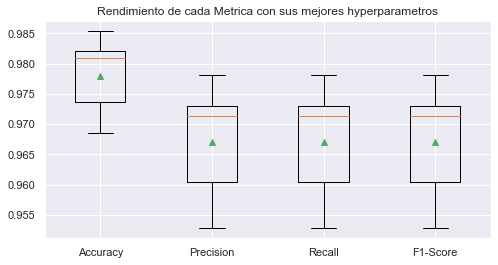

In [80]:
sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score']
bpGmean = list()
for i in range(0,len(lista_metrica)):
  rr = resultados[0][lista_metrica[i]]
  bpGmean.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean, labels = nombres, showmeans=True)
plt.show()

In [81]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, score_type):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='darkblue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='darkblue')
    
    plt.plot(train_sizes, val_mean, color='darkgreen', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='darkgreen')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.grid()
    plt.ylabel(score_type)
    plt.legend(loc='lower left')
    plt.show()
    
def mi_ModeloYCurvasDT(Xin):
      

    modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42)

    pipeline = Pipeline(steps=[('ct',CT1),('m',modeloDT_Optimizado)])


    mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xin,
                                                        y = Y1train,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_gmean),
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Accuracy")
    


Curvas de aprendizaje del modelo DT:


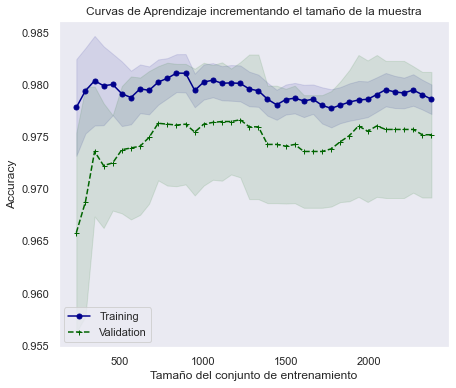

In [82]:
print('Curvas de aprendizaje del modelo DT:')
mi_ModeloYCurvasDT(X1train)

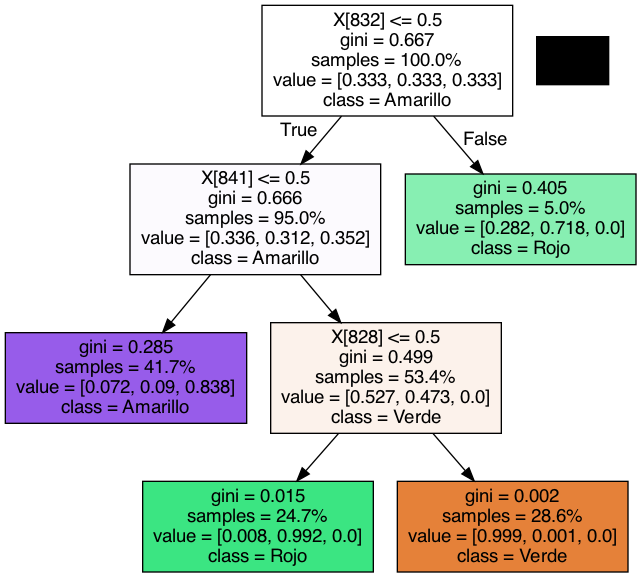

In [238]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42,
                                    max_features = 'sqrt')
Xct = CT1.fit(X1train)
Xxt = Xct.transform(X1train)
modeloDT_Optimizado.fit(Xxt, Y1train)


dot_data = tree.export_graphviz(decision_tree=modeloDT_Optimizado, 
                                out_file=None,
                                max_depth=gridDT.best_params_.get('m__max_depth'),
                                
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

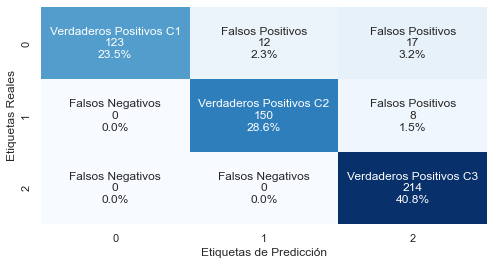

In [104]:
#Evaluamos el modelo par sacr la matriz de confusion.
pipeline = Pipeline(steps=[('ct',CT1),('m',modeloDT_Optimizado)])

pipeline.fit(X1train, Y1train)

yhat = pipeline.predict(X1test)

cm = confusion_matrix(Y1test, yhat)

txt = ['Verdaderos Positivos C1','Falsos Positivos','Falsos Positivos',
       'Falsos Negativos','Verdaderos Positivos C2', 'Falsos Positivos',
       'Falsos Negativos','Falsos Negativos','Verdaderos Positivos C3']
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()

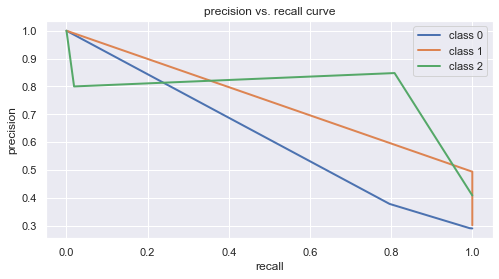

In [105]:
modeloDT_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42,
                                    max_features = 20,)

pipeline = Pipeline(steps=[('ct',CT1),('m',modeloDT_Optimizado)])

pipeline.fit(X1train, Y1train)

lr_probs = pipeline.predict_proba(X1test)
# Nos quedamos unicamente con las predicciones positicas


y_test_p = Y1test.copy()
my_vals = y_test_p['SEMAFORO_Type'].unique().tolist()
my_vals.sort()

  
y_test = label_binarize(Y1test, classes=my_vals)
n_classes = y_test.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
  precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], lr_probs[:, i])
  average_precision[i] = average_precision_score(y_test[:, i], lr_probs[:, i])
  plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

## **Modelo Random Forest**

In [229]:
# MODELO RANDOM FOREST

modeloRFC = RandomForestClassifier(random_state = 0)

dicc_gridRFC = {'m2__ccp_alpha':[0.2],
              'm2__criterion':['gini'],
        #      'm__max_depth':[1,8,15,20],
        #      'm__min_samples_split':[2,5,10],
              'm2__class_weight':['balanced'],
                           }


pipeline = Pipeline(steps=[('ct',CT1),('m2',modeloRFC)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
  

gridRFC = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_gridRFC, 
                    cv=cv, 
                    scoring= make_scorer(mi_gmean))


gridRFC.fit(X1train, np.ravel(Y1train))
gridRFC.best_params_

print('Mejor valor obtenido con la mejor combinación:', gridRFC.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridRFC.best_params_)
print('Métrica utilizada:', gridRFC.scoring)

Mejor valor obtenido con la mejor combinación: 0.9811154268002913
Mejor combinación de valores encontrados de los hiperparámetros: {'m2__ccp_alpha': 0.2, 'm2__class_weight': 'balanced', 'm2__criterion': 'gini'}
Métrica utilizada: make_scorer(mi_gmean)


In [230]:
modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                   # min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                   # max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)

# for key, metric in mismetricas.items():
resultados1 = list()   
pipeline = Pipeline(steps=[('ct',CT1),('m2',modeloRFC_Optimizado)])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

scores = cross_validate(pipeline, X1train, np.ravel(Y1train), scoring=mismetricas, cv=cv, return_train_score=True)


resultados1.append(scores)
print('\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\n\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\n\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\n\nmean Train Gmean: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\n\nmean Train f1-score: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (
                                                                                                 np.mean(resultados1[0]['train_Accuracy']),
                                                                                                 np.std(resultados1[0]['train_Accuracy']),
                                                                                                 np.mean(resultados1[0]['test_Accuracy']),
                                                                                                 np.std(resultados1[0]['test_Accuracy']),
                                                                                                 np.mean(resultados1[0]['train_Precision']),
                                                                                                 np.std(resultados1[0]['train_Precision']),  
                                                                                                 np.mean(resultados1[0]['test_Precision']),
                                                                                                 np.std(resultados1[0]['test_Precision']),  
                                                                                                 np.mean(resultados1[0]['train_Recall']),
                                                                                                 np.std(resultados1[0]['train_Recall']),
                                                                                                 np.mean(resultados1[0]['test_Recall']),
                                                                                                 np.std(resultados1[0]['test_Recall']),
                                                                                                 np.mean(resultados1[0]['train_Gmean']),
                                                                                                 np.std(resultados1[0]['train_Gmean']),
                                                                                                 np.mean(resultados1[0]['test_Gmean']),
                                                                                                 np.std(resultados1[0]['test_Gmean']),
                                                                                                 np.mean(resultados1[0]['train_F1Score']),
                                                                                                 np.std(resultados1[0]['train_F1Score']), 
                                                                                                 np.mean(resultados1[0]['test_F1Score']),
                                                                                                 np.std(resultados1[0]['test_F1Score']), 
                                                                                                  ))


mean Train Accuracy: 0.986 (0.0036)
mean Test Accuracy: 0.985 (0.0044)

mean Train Precision: 0.980 (0.0053)
mean Test Precision: 0.978 (0.0065)

mean Train Recall: 0.980 (0.0053)
mean Test Recall: 0.978 (0.0065)

mean Train Gmean: 0.985 (0.0040)
mean Test Gmean: 0.984 (0.0049)

mean Train f1-score: 0.980 (0.0053)
mean Test f1-score: 0.978 (0.0065)



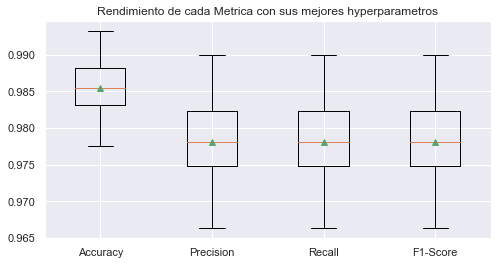

In [231]:
sns.set(rc={'figure.figsize':(8,4)})
nombres = ['Accuracy','Precision','Recall','F1-Score']
lista_metrica = ['test_Accuracy','test_Precision','test_Recall','test_F1Score']
bpGmean2 = list()
for i in range(0,len(lista_metrica)):
  rr = resultados1[0][lista_metrica[i]]
  bpGmean2.append(rr)
plt.title('Rendimiento de cada Metrica con sus mejores hyperparametros')
plt.boxplot(bpGmean2, labels = nombres, showmeans=True)
plt.show()

In [232]:
def mi_ModeloYCurvasRFC(Xin):
      

    modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                  #  min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                  #  max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)

    pipeline2 = Pipeline(steps=[('ct',CT1),('m2',modeloRFC_Optimizado)])


    mi_kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=42)

       
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline2 ,    
                                                        X = Xin,
                                                        y = np.ravel(Y1train),
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_gmean),
                                                        random_state=42)
     
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "Accuracy")



Curvas de aprendizaje del modelo RFC:


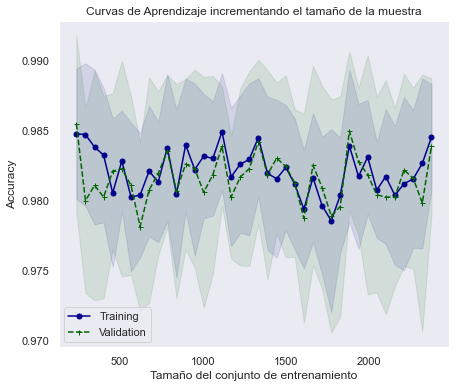

In [233]:
print('Curvas de aprendizaje del modelo RFC:')
mi_ModeloYCurvasRFC(X1train)

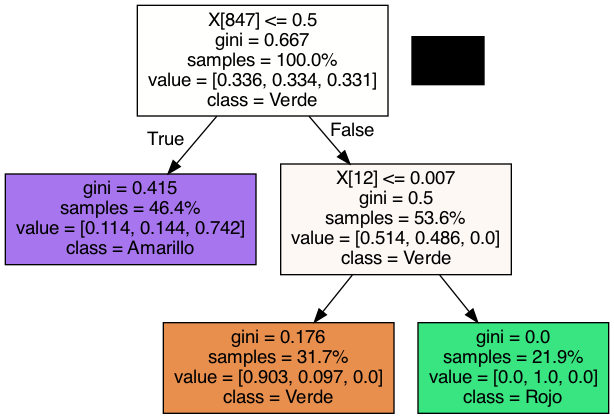

In [248]:
modeloRFC_Optimizado = RandomForestClassifier(ccp_alpha=gridRFC.best_params_.get('m2__ccp_alpha'),                               
                                    class_weight=gridRFC.best_params_.get('m2__class_weight'),                                
                                    criterion=gridRFC.best_params_.get('m2__criterion'),
                                  #  min_samples_split=gridRFC.best_params_.get('m__min_samples_split'),
                                  #  max_depth = gridRFC.best_params_.get('m__max_depth'),
                                    random_state = 42)


Z=np.ravel(Y1train)
Xct1 = CT1.fit(X1train)
Xxt1 = Xct1.transform(X1train)
modeloRFC_Optimizado.fit(Xxt1, Z)
estimator = modeloRFC_Optimizado.estimators_[10]



dot_data2 = tree.export_graphviz(estimator, 
                                out_file=None,
                                max_depth=gridRFC.best_params_.get('m2__max_depth'),
                                
                                class_names=["Verde","Rojo","Amarillo"],
                                filled=True,
                                rotate=False,
                                proportion=True)

graph2 = pydotplus.graph_from_dot_data(dot_data2)
Image(graph2.create_png())

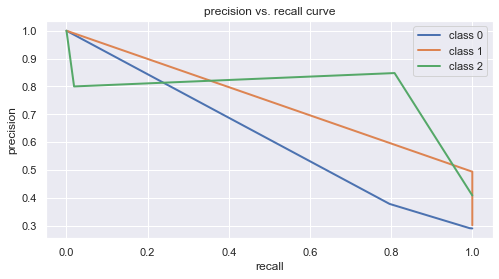

In [235]:
modeloRFC_Optimizado = DecisionTreeClassifier(max_depth=gridDT.best_params_.get('m__max_depth'),
                                    ccp_alpha=gridDT.best_params_.get('m__ccp_alpha'),                               
                                    class_weight=gridDT.best_params_.get('m__class_weight'),                                
                                    criterion=gridDT.best_params_.get('m__criterion'),
                                    min_samples_split=gridDT.best_params_.get('m__min_samples_split'),
                                    random_state = 42,
                                    max_features = 20,)

pipeline = Pipeline(steps=[('ct', CT1),('m',modeloRFC_Optimizado)])

pipeline.fit(X1train, Y1train)

lr_probs = pipeline.predict_proba(X1test)
# Nos quedamos unicamente con las predicciones positicas


y_test_p = Y1test.copy()
my_vals = y_test_p['SEMAFORO_Type'].unique().tolist()
my_vals.sort()

  
y_test = label_binarize(y_test, classes=my_vals)
n_classes = y_test.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
  precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], lr_probs[:, i])
  average_precision[i] = average_precision_score(y_test[:, i], lr_probs[:, i])
  plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()